In [3]:
import numpy as np

class LogisticRegression:
    """Logistic Regression Model from Scratch."""
    
    def __init__(self, learning_rate=0.01, n_iters=500):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _log_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = self._log_loss(y, y_pred)
            self.loss_history.append(loss)

    def predict_proba(self, X):
        return self._sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


Logistic Regression Accuracy: 0.98


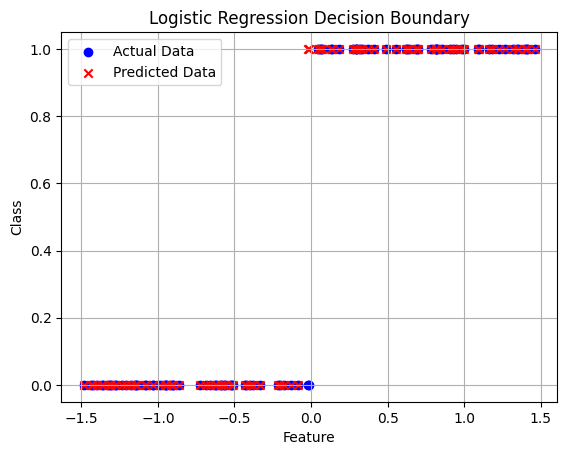

In [4]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic data for logistic regression
np.random.seed(42)
X_logistic = 3 * np.random.rand(100, 1) - 1.5
y_logistic = (X_logistic > 0).astype(int)  

# Train logistic regression model
logistic_model = LogisticRegression(learning_rate=0.1, n_iters=1000)
logistic_model.fit(X_logistic, y_logistic)
y_pred_logistic = logistic_model.predict(X_logistic)

# Evaluate logistic regression
acc_logistic = accuracy_score(y_logistic, y_pred_logistic)
print("Logistic Regression Accuracy:", acc_logistic)

# Plot decision boundary
plt.scatter(X_logistic, y_logistic, color='blue', label='Actual Data')
plt.scatter(X_logistic, y_pred_logistic, color='red', marker='x', label='Predicted Data')
plt.xlabel("Feature")
plt.ylabel("Class")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()
